# Understanding Data

## Penjelasan Understanding Data

Understanding Data adalah tahap awal dalam Knowledge Discovery in Databases (KDD) atau data mining yang bertujuan untuk memahami karakteristik, struktur, dan pola dalam data sebelum dilakukan analisis lebih lanjut. Tahap ini mencakup eksplorasi data, identifikasi atribut penting, penanganan data yang hilang atau tidak valid, serta pemahaman konteks bisnis yang terkait. Keberhasilan tahap ini sangat berpengaruh terhadap akurasi dan efektivitas proses analisis data berikutnya.



## Pengumpulan data

Tahap pengumpulan data merupakan proses memperoleh dan menyimpan data dari berbagai sumber yang relevan sesuai dengan tujuan analisis. Dalam tahap ini, penting untuk memastikan bahwa data yang dikumpulkan memiliki kualitas yang baik, lengkap, dan sesuai dengan kebutuhan analisis. Pada proyek ini, data telah dikumpulkan dan disimpan di Aiven.io, yang mengintegrasikan berbagai sumber database yang berbeda guna mendukung analisis yang lebih luas dan komprehensif.

### Install Package untuk MySQL dan PosgreSQL

Untuk mengakses dan mengelola database MySQL serta PostgreSQL, diperlukan instalasi paket yang sesuai. Paket ini memungkinkan pengguna untuk melakukan koneksi, menjalankan query, serta mengelola data dengan lebih efisien. Berikut adalah langkah-langkah instalasi paket yang dibutuhkan:

In [ ]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
!pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 19.9 MB/s eta 0:00:00


In [ ]:
!pip install pandas tabulate

In [ ]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.7 MB/s eta 0:00:00


## Koneksi ke Database Mysql dan PosgreSQL melalui dari aiven.io

### Koneksi ke PosgreSQL dan menampilkan datanya

In [ ]:
import psycopg2
import pandas as pd
from tabulate import tabulate

# Koneksi ke database PostgreSQL
PG_HOST = "posgesqlpendata23-175-posgresqlpendata23-175.h.aivencloud.com"
PG_PORT = "17047"
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_XfGwRG6_6e5BdqZXovg"

try:
    # Membuat koneksi
    conn = psycopg2.connect(
        host=PG_HOST,
        port=PG_PORT,
        dbname=PG_NAME,
        user=PG_USER,
        password=PG_PASS,
        sslmode="require"
    )
    cur = conn.cursor()

    # Menjalankan query
    cur.execute("SELECT * FROM irisposgre.posgre;")  # Ganti dengan nama skema & tabel yang benar
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()


+-----+------+-----------------+----------------+---------------+
|     |   id | Class           |   sepal length |   sepal width |
|-----+------+-----------------+----------------+---------------|
|   0 |    1 | Iris-setosa     |            5.1 |           3.5 |
|   1 |    2 | Iris-setosa     |            4.9 |           3   |
|   2 |    3 | Iris-setosa     |            4.7 |           3.2 |
|   3 |    4 | Iris-setosa     |            4.6 |           3.1 |
|   4 |    5 | Iris-setosa     |            5   |           3.6 |
|   5 |    6 | Iris-setosa     |            5.4 |           3.9 |
|   6 |    7 | Iris-setosa     |            4.6 |           3.4 |
|   7 |    8 | Iris-setosa     |            5   |           3.4 |
|   8 |    9 | Iris-setosa     |            4.4 |           2.9 |
|   9 |   10 | Iris-setosa     |            4.9 |           3.1 |
|  10 |   11 | Iris-setosa     |            5.4 |           3.7 |
|  11 |   12 | Iris-setosa     |            4.8 |           3.4 |
|  12 |   

### Koneksi ke MySQL dan menampilkan datanya

In [ ]:
import pymysql
import pandas as pd
from tabulate import tabulate

# Konfigurasi koneksi ke database MySQL
DB_HOST = "mysql-pendata23-175-mysqlpendata23-175.g.aivencloud.com"
DB_PORT = 17974
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_756YWhIqpe1WzSKsGNx"

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=DB_HOST,
        port=DB_PORT,
        user=DB_USER,
        password=DB_PASS,
        database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor  # Mengembalikan hasil sebagai dictionary
    )
    cur = conn.cursor()

    # Menjalankan query SQL
    query = "SELECT * FROM irismysql.flowers;"  # Sesuaikan dengan nama tabel
    cur.execute(query)
    rows = cur.fetchall()

    # Jika tabel kosong
    if not rows:
        print("Tabel kosong, tidak ada data untuk ditampilkan.")
    else:
        # Mengubah hasil query menjadi DataFrame pandas
        df = pd.DataFrame(rows)

        # Menampilkan 3 data awal, titik-titik di tengah, dan 3 data akhir
        df_selected = pd.concat([df.head(3), pd.DataFrame([["..."] * len(df.columns)], columns=df.columns), df.tail(3)])

        # Menampilkan tabel dengan format psql
        print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi ke database
    if cur:
        cur.close()
    if conn:
        conn.close()


+------+----------------+----------------+---------------+
| id   | class          | petal length   | petal width   |
|------+----------------+----------------+---------------|
| 1    | Iris-setosa    | 1.4            | 0.2           |
| 2    | Iris-setosa    | 1.4            | 0.2           |
| 3    | Iris-setosa    | 1.3            | 0.2           |
| ...  | ...            | ...            | ...           |
| 148  | Iris-virginica | 5.2            | 2.0           |
| 149  | Iris-virginica | 5.4            | 2.3           |
| 150  | Iris-virginica | 5.1            | 1.8           |
+------+----------------+----------------+---------------+


## Sampling data

Sampling data adalah proses pengambilan subset dari dataset yang lebih besar untuk dianalisis, sehingga memungkinkan pemahaman yang lebih efisien tanpa harus memproses seluruh data. Teknik ini digunakan untuk mengurangi beban komputasi, mempercepat analisis, serta tetap mendapatkan representasi yang akurat dari keseluruhan dataset.

## Profiling data

Profiling data adalah proses eksplorasi dan analisis awal terhadap dataset untuk memahami karakteristik setiap variabel, termasuk tipe data, distribusi nilai, serta mendeteksi data yang hilang atau tidak valid. Tahap ini bertujuan untuk memastikan bahwa data memiliki kualitas yang baik sebelum digunakan dalam analisis lebih lanjut.


### Menarik data base dari PosgreSql dan Mysql menjadi 1 tabel sekaligus mengecek apakah terdapat mising value dan ketidak konsistenan ketika data digabungkan

In [ ]:
import psycopg2
import pymysql
import pandas as pd
from tabulate import tabulate

# Koneksi PostgreSQL
PG_HOST = "posgesqlpendata23-175-posgresqlpendata23-175.h.aivencloud.com"
PG_PORT = "17047"
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_XfGwRG6_6e5BdqZXovg"

# Koneksi MySQL
DB_HOST = "mysql-pendata23-175-mysqlpendata23-175.g.aivencloud.com"
DB_PORT = 17974
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_756YWhIqpe1WzSKsGNx"

try:
    # Koneksi PostgreSQL
    conn = psycopg2.connect(
        host=PG_HOST, port=PG_PORT, dbname=PG_NAME,
        user=PG_USER, password=PG_PASS, sslmode="require"
    )
    cur = conn.cursor()

    # Ambil data dari PostgreSQL (ID, Class, Sepal Length, Sepal Width)
    cur.execute("SELECT * FROM irisposgre.posgre;")  # Sesuaikan tabel
    pg_rows = cur.fetchall()
    pg_columns = [desc[0] for desc in cur.description]
    pg_df = pd.DataFrame(pg_rows, columns=pg_columns)

    # Koneksi MySQL
    mysql_conn = pymysql.connect(
        host=DB_HOST, port=DB_PORT, user=DB_USER,
        password=DB_PASS, database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    mysql_cur = mysql_conn.cursor()

    # Ambil data dari MySQL (ID, Petal Length, Petal Width)
    mysql_cur.execute("SELECT * FROM irismysql.flowers;")  # Sesuaikan tabel
    mysql_rows = mysql_cur.fetchall()
    mysql_df = pd.DataFrame(mysql_rows)

    # Menggabungkan kedua tabel berdasarkan ID
    combined_df = pd.merge(pg_df, mysql_df, on="id", how="inner")  # Inner join

    # Mengatur urutan kolom agar class berada di sebelah ID
    ordered_columns = ["id", "class", "sepal length", "sepal width", "petal length", "petal width"]
    combined_df = combined_df[ordered_columns]

    # Menampilkan 3 data awal, tanda "..." di tengah, dan 3 data akhir
    df_selected = pd.concat([
        combined_df.head(3),
        pd.DataFrame([["..."] * len(combined_df.columns)], columns=combined_df.columns),
        combined_df.tail(3)
    ])

    # Menampilkan hasil dalam format tabel
    print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi database
    if cur:
        cur.close()
    if conn:
        conn.close()
    if mysql_cur:
        mysql_cur.close()
    if mysql_conn:
        mysql_conn.close()


+------+----------------+----------------+---------------+----------------+---------------+
| id   | class          | sepal length   | sepal width   | petal length   | petal width   |
|------+----------------+----------------+---------------+----------------+---------------|
| 1    | Iris-setosa    | 5.1            | 3.5           | 1.4            | 0.2           |
| 2    | Iris-setosa    | 4.9            | 3.0           | 1.4            | 0.2           |
| 3    | Iris-setosa    | 4.7            | 3.2           | 1.3            | 0.2           |
| ...  | ...            | ...            | ...           | ...            | ...           |
| 148  | Iris-virginica | 6.5            | 3.0           | 5.2            | 2.0           |
| 149  | Iris-virginica | 6.2            | 3.4           | 5.4            | 2.3           |
| 150  | Iris-virginica | 5.9            | 3.0           | 5.1            | 1.8           |
+------+----------------+----------------+---------------+----------------+-----

In [ ]:
import psycopg2
import pymysql
import pandas as pd
from tabulate import tabulate

# Koneksi PostgreSQL
PG_HOST = "posgesqlpendata23-175-posgresqlpendata23-175.h.aivencloud.com"
PG_PORT = "17047"
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_XfGwRG6_6e5BdqZXovg"

# Koneksi MySQL
DB_HOST = "mysql-pendata23-175-mysqlpendata23-175.g.aivencloud.com"
DB_PORT = 17974
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_756YWhIqpe1WzSKsGNx"

try:
    # Koneksi PostgreSQL
    conn = psycopg2.connect(
        host=PG_HOST, port=PG_PORT, dbname=PG_NAME,
        user=PG_USER, password=PG_PASS, sslmode="require"
    )
    cur = conn.cursor()

    # Ambil data dari PostgreSQL (ID, Class, Sepal Length, Sepal Width)
    cur.execute("SELECT * FROM irisposgre.posgre;")  # Sesuaikan tabel
    pg_rows = cur.fetchall()
    pg_columns = [desc[0] for desc in cur.description]
    pg_df = pd.DataFrame(pg_rows, columns=pg_columns)

    # Koneksi MySQL
    mysql_conn = pymysql.connect(
        host=DB_HOST, port=DB_PORT, user=DB_USER,
        password=DB_PASS, database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    mysql_cur = mysql_conn.cursor()

    # Ambil data dari MySQL (ID, Petal Length, Petal Width)
    mysql_cur.execute("SELECT * FROM irismysql.flowers;")  # Sesuaikan tabel
    mysql_rows = mysql_cur.fetchall()
    mysql_df = pd.DataFrame(mysql_rows)

    # Menggabungkan kedua tabel berdasarkan ID
    combined_df = pd.merge(pg_df, mysql_df, on="id", how="inner")  # Inner join

    # Mengatur urutan kolom agar class berada di sebelah ID
    ordered_columns = ["id", "class", "sepal length", "sepal width", "petal length", "petal width"]
    combined_df = combined_df[ordered_columns]

    # Menyimpan hasil ke dalam file CSV
    combined_df.to_csv("hasil_penggabungan.csv", index=False)
    print("Data berhasil disimpan ke hasil_penggabungan.csv")

    # Menampilkan 3 data awal, tanda "..." di tengah, dan 3 data akhir
    df_selected = pd.concat([
        combined_df.head(3),
        pd.DataFrame([["..."] * len(combined_df.columns)], columns=combined_df.columns),
        combined_df.tail(3)
    ])

    # Menampilkan hasil dalam format tabel
    print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi database
    if cur:
        cur.close()
    if conn:
        conn.close()
    if mysql_cur:
        mysql_cur.close()
    if mysql_conn:
        mysql_conn.close()

Data berhasil disimpan ke hasil_penggabungan.csv
+------+----------------+----------------+---------------+----------------+---------------+
| id   | class          | sepal length   | sepal width   | petal length   | petal width   |
|------+----------------+----------------+---------------+----------------+---------------|
| 2    | Iris-setosa    | 4.9            | 3.0           | 1.4            | 0.2           |
| 3    | Iris-setosa    | 4.7            | 3.2           | 1.3            | 0.2           |
| 4    | Iris-setosa    | 4.6            | 3.1           | 1.5            | 0.2           |
| ...  | ...            | ...            | ...           | ...            | ...           |
| 149  | Iris-virginica | 6.2            | 3.4           | 5.4            | 2.3           |
| 150  | Iris-virginica | 5.9            | 3.0           | 5.1            | 1.8           |
| 1    | Iris-setosa    | 20.1           | 30.5          | 86.4           | 70.0          |
+------+----------------+------

##Visualisasi Data

Visualisasi data adalah teknik dalam analisis dataset yang digunakan untuk memahami, mengeksplorasi, dan menyajikan pola dalam data secara lebih intuitif. Dengan visualisasi, kita dapat mendeteksi tren, hubungan antar variabel, serta distribusi data dengan lebih cepat dan mudah. Penggunaan diagram, grafik, atau plot membantu menyederhanakan interpretasi data serta mempercepat proses analisis.

## Korelasi dan Asosiasi

Korelasi dan asosiasi merupakan metode analisis untuk mengukur hubungan antar variabel dalam dataset. Korelasi digunakan untuk menghitung koefisien hubungan linier antara dua variabel, sedangkan asosiasi lebih luas cakupannya dalam mengidentifikasi keterkaitan antara elemen dalam dataset. Analisis ini bertujuan untuk memahami sejauh mana perubahan dalam satu variabel berpengaruh terhadap variabel lainnya.

## Eksplorasi Data

Eksplorasi data adalah tahap awal dalam analisis yang berfokus pada pemahaman karakteristik dataset, distribusi nilai, serta pola yang terkandung di dalamnya. Proses ini mencakup perhitungan deskripsi statistik seperti mean, median, modus, standar deviasi, nilai minimum, dan maksimum. Selain itu, eksplorasi data sering kali dibantu dengan visualisasi seperti histogram, scatter plot, atau box plot untuk mengidentifikasi pola, tren, dan potensi anomali dalam data.

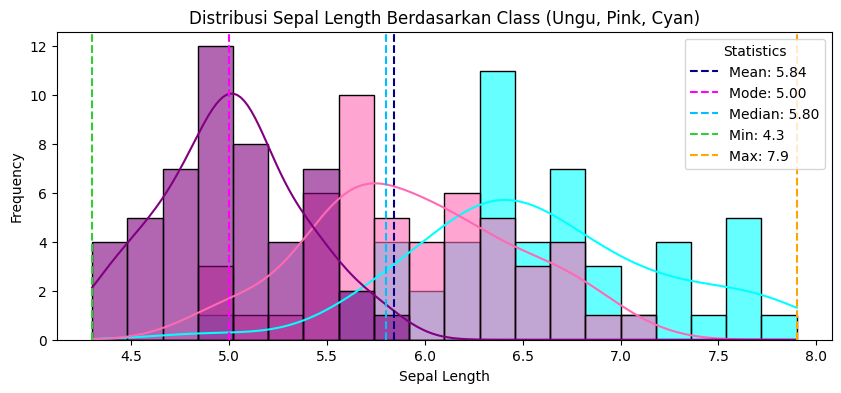

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "sepal length"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "purple",
    "Iris-versicolor": "hotpink",
    "Iris-virginica": "cyan"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
sns.histplot(data=combined_df, x=sepal_length_col, hue=class_col, bins=20, kde=True, alpha=0.6, palette=custom_palette)

# Tambahkan garis rata-rata, median, min, dan max dengan warna berbeda
plt.axvline(mean_sepal_length, color="darkblue", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="magenta", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="deepskyblue", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="limegreen", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="orange", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Tambahkan label
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Distribusi Sepal Length Berdasarkan Class (Ungu, Pink, Cyan)")
plt.legend(title="Statistics")

# Tampilkan plot
plt.show()

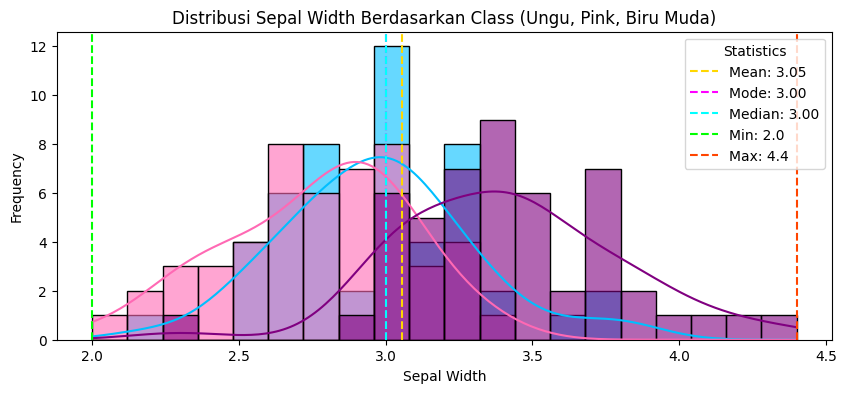

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "sepal width"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "purple",
    "Iris-versicolor": "hotpink",
    "Iris-virginica": "deepskyblue"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
sns.histplot(data=combined_df, x=sepal_length_col, hue=class_col, bins=20, kde=True, alpha=0.6, palette=custom_palette)

# Tambahkan garis rata-rata, median, min, dan max dengan warna berbeda
plt.axvline(mean_sepal_length, color="gold", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="magenta", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="cyan", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="lime", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="orangered", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Tambahkan label
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.title("Distribusi Sepal Width Berdasarkan Class (Ungu, Pink, Biru Muda)")
plt.legend(title="Statistics")

# Tampilkan plot
plt.show()

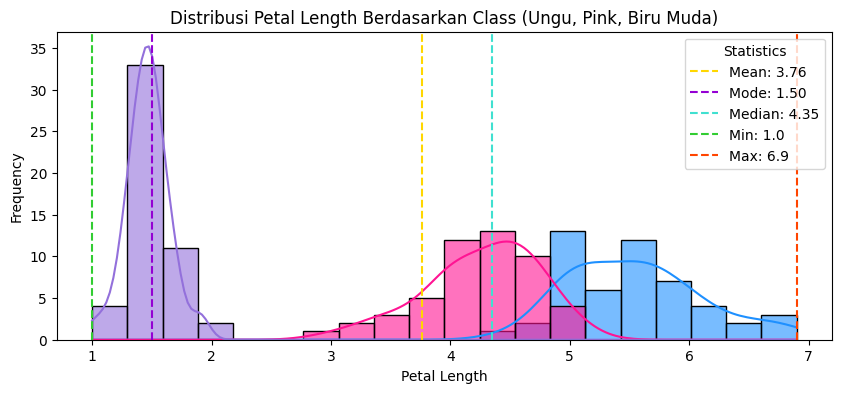

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "petal length"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "mediumpurple",
    "Iris-versicolor": "deeppink",
    "Iris-virginica": "dodgerblue"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
sns.histplot(data=combined_df, x=sepal_length_col, hue=class_col, bins=20, kde=True, alpha=0.6, palette=custom_palette)

# Tambahkan garis rata-rata, median, min, dan max dengan warna berbeda
plt.axvline(mean_sepal_length, color="gold", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="darkviolet", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="turquoise", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="limegreen", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="orangered", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Tambahkan label
plt.xlabel("Petal Length")
plt.ylabel("Frequency")
plt.title("Distribusi Petal Length Berdasarkan Class (Ungu, Pink, Biru Muda)")
plt.legend(title="Statistics")

# Tampilkan plot
plt.show()

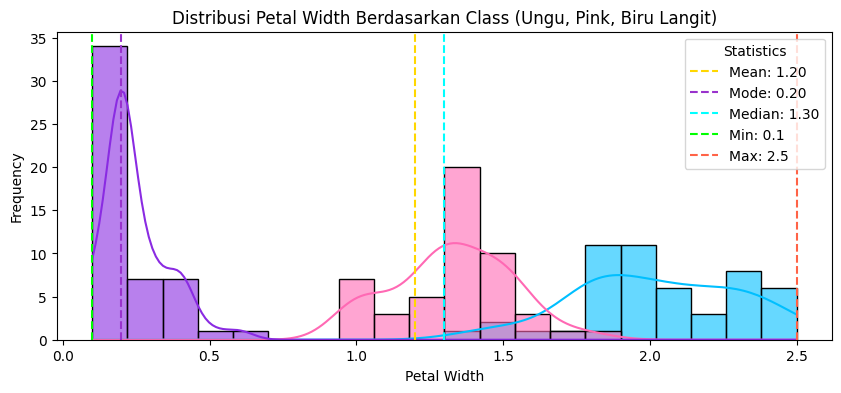

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom benar
sepal_length_col = "petal width"  # Sesuaikan dengan nama kolom yang benar
class_col = "class"  # Sesuaikan dengan nama kolom yang benar

# Tetapkan warna khusus untuk setiap class
custom_palette = {
    "Iris-setosa": "blueviolet",
    "Iris-versicolor": "hotpink",
    "Iris-virginica": "deepskyblue"
}

# Hitung statistik dasar
mean_sepal_length = combined_df[sepal_length_col].mean()
median_sepal_length = combined_df[sepal_length_col].median()
min_sepal_length = combined_df[sepal_length_col].min()
max_sepal_length = combined_df[sepal_length_col].max()
mode_sepal_length = combined_df[sepal_length_col].mode()[0]

# Buat plot distribusi dengan warna yang sudah ditentukan
plt.figure(figsize=(10, 4))
sns.histplot(data=combined_df, x=sepal_length_col, hue=class_col, bins=20, kde=True, alpha=0.6, palette=custom_palette)

# Tambahkan garis rata-rata, median, min, dan max dengan warna berbeda
plt.axvline(mean_sepal_length, color="gold", linestyle="--", label=f"Mean: {mean_sepal_length:.2f}")
plt.axvline(mode_sepal_length, color="darkorchid", linestyle="--", label=f"Mode: {mode_sepal_length:.2f}")
plt.axvline(median_sepal_length, color="cyan", linestyle="--", label=f"Median: {median_sepal_length:.2f}")
plt.axvline(min_sepal_length, color="lime", linestyle="--", label=f"Min: {min_sepal_length:.1f}")
plt.axvline(max_sepal_length, color="tomato", linestyle="--", label=f"Max: {max_sepal_length:.1f}")

# Tambahkan label
plt.xlabel("Petal Width")
plt.ylabel("Frequency")
plt.title("Distribusi Petal Width Berdasarkan Class (Ungu, Pink, Biru Langit)")
plt.legend(title="Statistics")

# Tampilkan plot
plt.show()

## Indentifikasi Masalah Data

merupakan proses memahami kualitas data dan memastikan bahwa data yang akan kita analisis atau gunakan dalam model machine learning sudah bersih, lengkap, dan sesuai format yang diharapkan. Hal yang perlu diperhatikan adalah:

- Missing Values: Menemukan data yang hilang atau tidak lengkap.
- Outliers: Mendeteksi nilai-nilai ekstrem yang mungkin merupakan kesalahan atau anomali.
- Duplikasi Data: Mengidentifikasi baris atau entri yang duplikat.
- Inkonsistensi: Memeriksa apakah ada ketidaksesuaian dalam format atau nilai data.

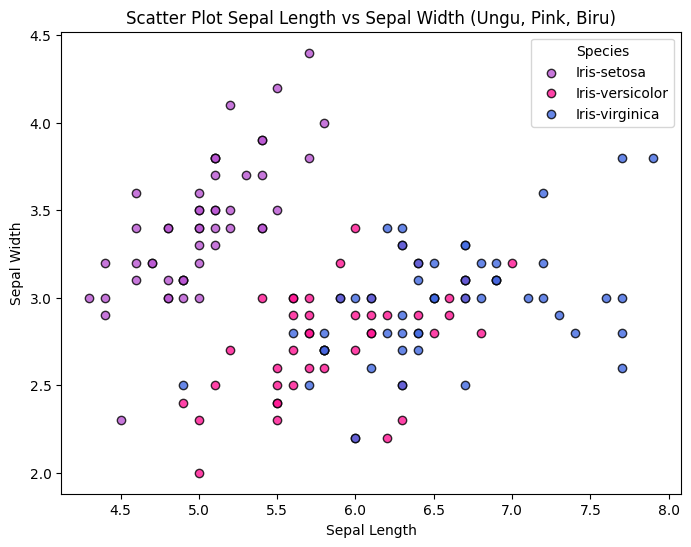

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan nama kolom sesuai
x_col = "sepal length"
y_col = "sepal width"
class_col = "class"

# Warna baru yang lebih menarik
colors = {
    "Iris-setosa": "mediumorchid",  # Ungu Muda
    "Iris-versicolor": "deeppink",  # Pink Cerah
    "Iris-virginica": "royalblue"   # Biru Elektrik
}

plt.figure(figsize=(8, 6))

# Scatter plot dengan warna berdasarkan kelas
for species, color in colors.items():
    subset = combined_df[combined_df[class_col] == species]
    plt.scatter(subset[x_col], subset[y_col], label=species, color=color, alpha=0.8, edgecolors="black")

# Label sumbu
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Scatter Plot Sepal Length vs Sepal Width (Ungu, Pink, Biru)")

# Tambahkan legenda
plt.legend(title="Species")

# Tampilkan plot
plt.show()

## Validasi data

Validasi data adalah proses pengecekan dan verifikasi data untuk memastikan bahwa data yang digunakan akurat, lengkap, konsisten, dan sesuai dengan standar yang ditetapkan sebelum dianalisis atau divisualisasikan. Proses ini bertujuan untuk mengidentifikasi dan mengoreksi kesalahan, inkonsistensi, atau nilai yang hilang agar data dapat memberikan hasil yang valid dan mencerminkan fenomena yang sebenarnya.